# Problem Statement

### Flight ticket prices can be something hard to guess, today we might see a price, checkout the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

- Task 1:- Prepare a complete data analysis report on the given data.
- Task 2:- Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings   #in order to ignore the warnings.
warnings.filterwarnings('ignore')

- Since data is in form of excel file, we need to use pandas read_excel to load the data.

In [2]:
flight_data= pd.read_excel(r"Flight_Fare.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

### DATA PREPROCESSING

In [4]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
flight_data.shape

(10683, 11)

In [7]:
flight_data.size

117513

In [8]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
# Check for missing values
missing_values = flight_data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [11]:
# Calculate the percentage of missing values
missing_percentage = (flight_data.isnull().sum() / len(flight_data)) * 100

print("Missing Percentage:\n", missing_percentage)

Missing Percentage:
 Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64


In [12]:
# Decide on handling strategy based on the percentage
# Example: If the percentage is very low, we might drop the rows or fill with a common value
if missing_percentage['Total_Stops'] > 0:
    flight_data['Total_Stops'].fillna('No info', inplace=True)

In [14]:
if missing_percentage['Route'] > 0:
    flight_data['Route'].fillna('No info', inplace=True)

In [15]:
# Verify that missing values are handled
print("Missing Values after handling:\n", flight_data.isnull().sum())

Missing Values after handling:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


# Exploratory Data Analysis

## 1).Univariate analysis - Summarize only one variable at a time
### Numerical Columns:
- Summary Statistics: Mean, median, standard deviation, etc.
- Histogram: To visualize the distribution.
- Box plot: To identify outliers and visualize distribution.


### Categorical Columns:
- Frequency Table: To count the occurrences of each category.
- Bar plot: To visualize the count of each category.
- Count plot: To show the frequency or count of each category.

## 2).Bivariate analysis- Compares two variable
### Numerical vs. Numerical:
- Scatter plot: To visualize the relationship.
- Correlation: To measure the strength of the relationship.
- Line plot: If one variable is time-based.

### Numerical vs. Categorical:
- Box plot: To compare the distribution of the numerical variable across different categories.
- Violin plot: Similar to box plots but with a density estimate.
- Bar plot: To show the mean or sum of the numerical variable for each category.

### Categorical vs. Categorical:
- Heatmap: To visualize the contingency table.
- Clustered Bar Plots: To compare the frequencies of combinations.

## 3).Multivariate analysis- Compares more than two variables
- Pair plot: To visualize pairwise relationships.

- Heatmap: To show correlations between numerical variables.

- PCA (Principal Component Analysis): To reduce dimensionality and visualize high-dimensional data. Numerical Columns:

- Correlation Matrix: To visualize the correlation between all numerical columns.

<Axes: xlabel='Price', ylabel='Count'>

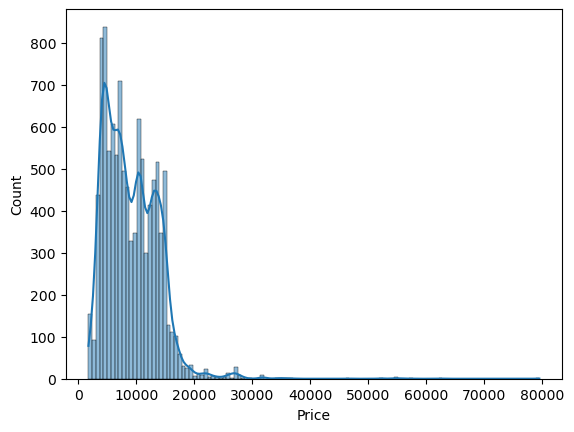

In [16]:
# univariate analysis
sns.histplot(data = flight_data, x='Price', kde = True)

In [17]:
#Categorical Columns:
# Airline,Source,destination,Route, Tota_stops, Additional_info
# Bar plot, Count plot
flight_data.describe(include = 'object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683
unique,12,44,5,6,129,222,1343,368,6,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


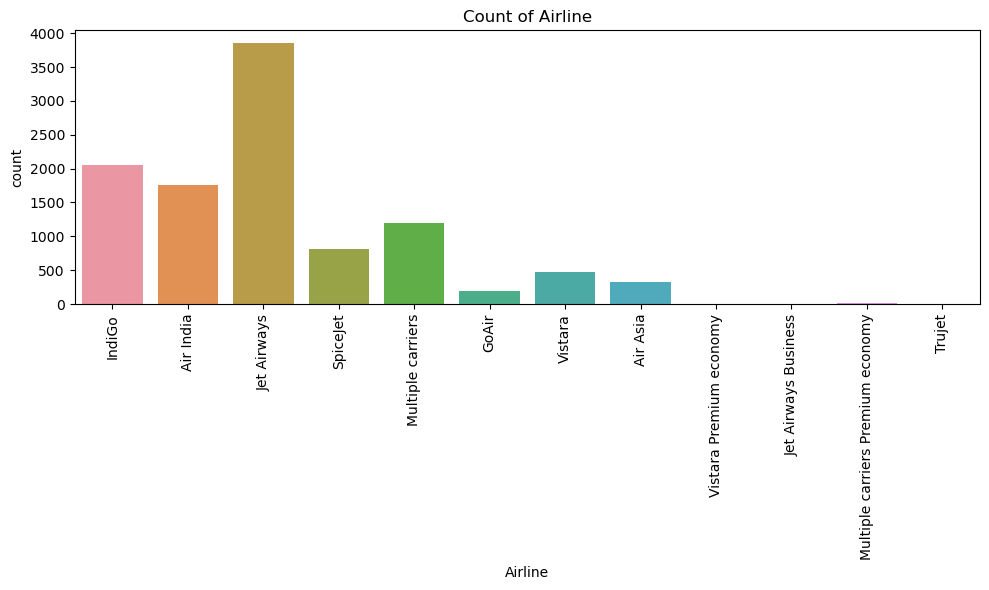

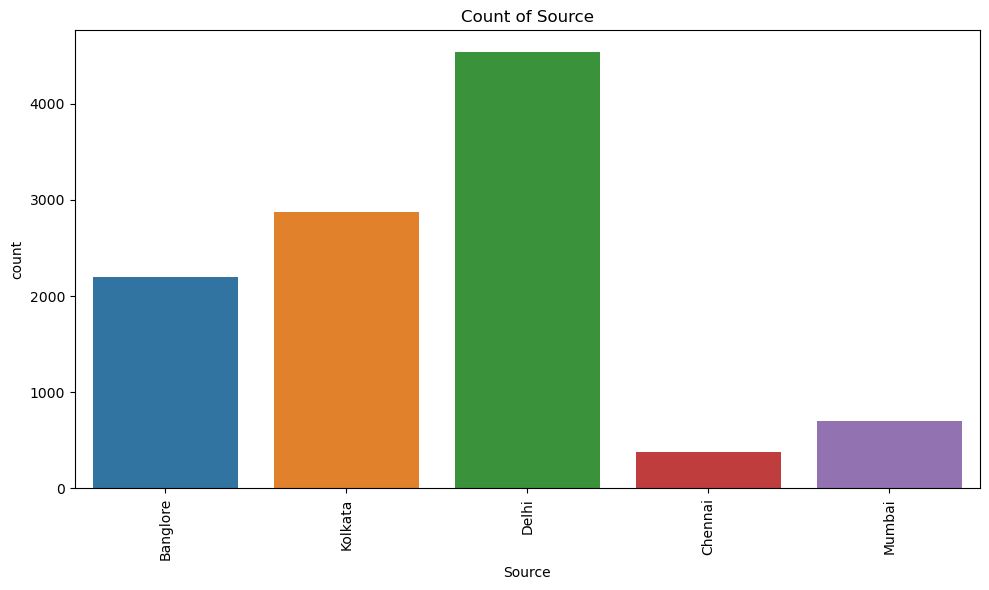

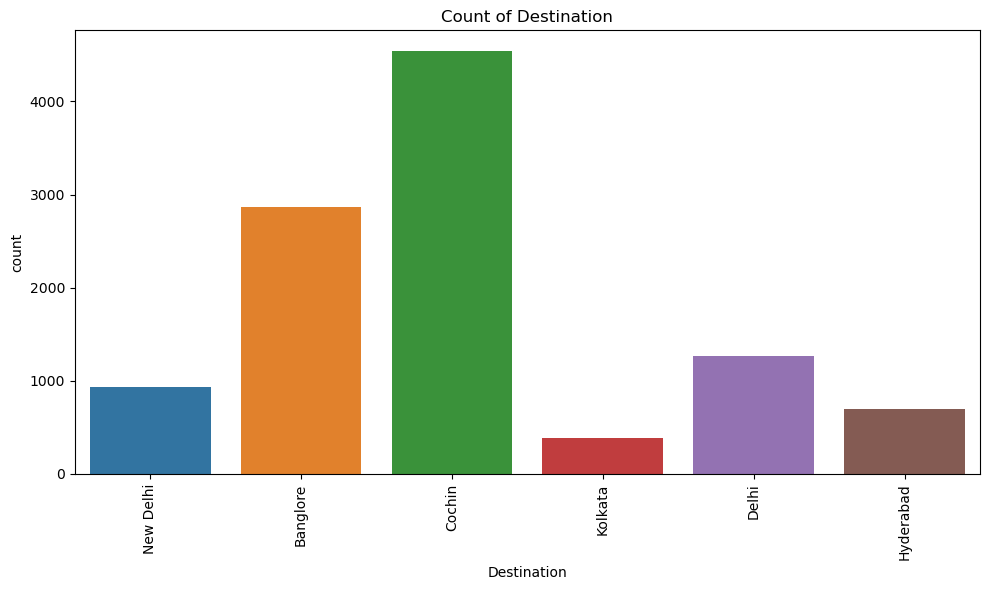

In [18]:
category_col = ['Airline','Source', 'Destination']
for cat in category_col:
    plt.figure(figsize=(10,6))
    sns.countplot(flight_data, x=cat)
    plt.title(f'Count of {cat}')
    plt.xticks(rotation = 90)
    plt.tight_layout();

In [19]:
# Bi - Variate Analysis
# Numerical vs. Categorical: 
# 1).Price vs Airline
# 2). Price vs Source
# 3).Price vs Destination

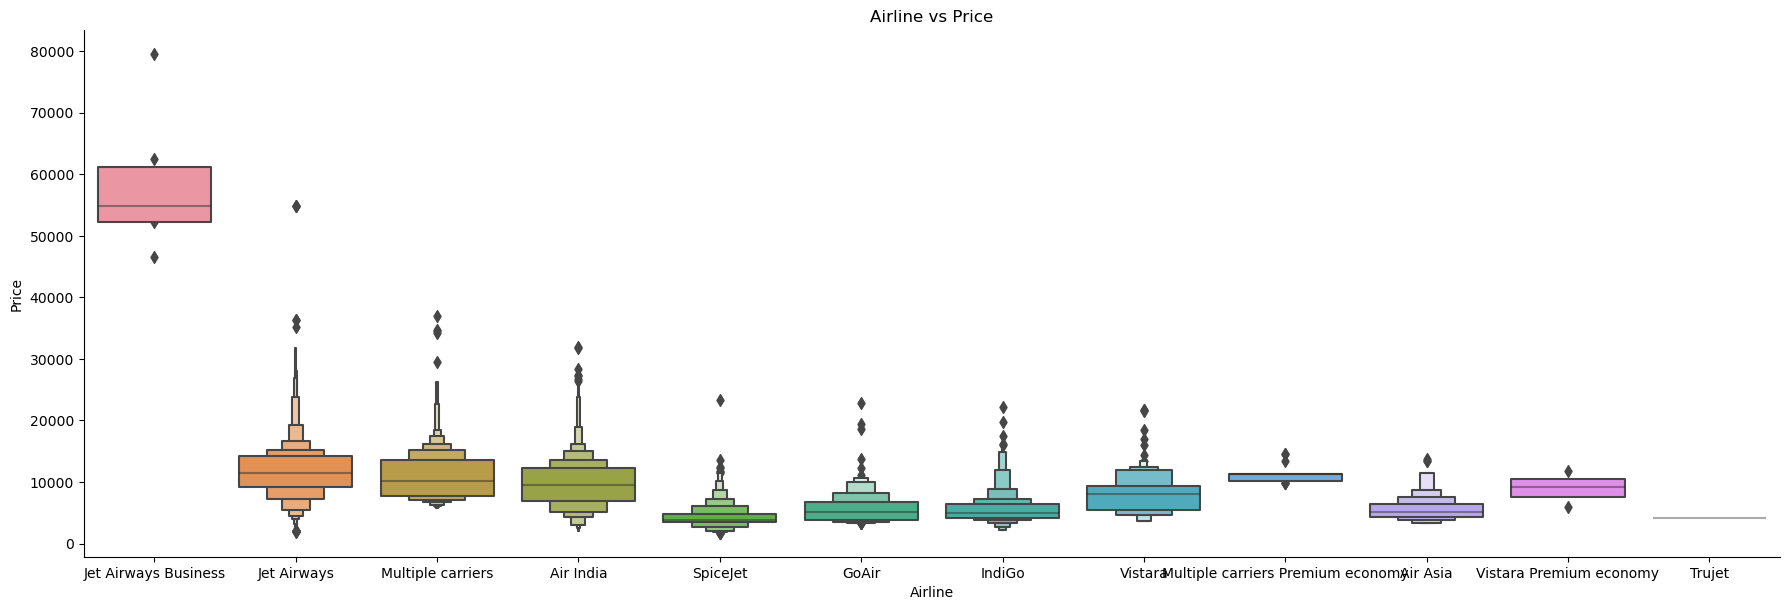

In [20]:
sns.catplot(x = 'Airline', y= 'Price', data=flight_data.sort_values('Price', ascending=False), kind= 'boxen', height = 6, aspect=3)
plt.title("Airline vs Price")
plt.show()

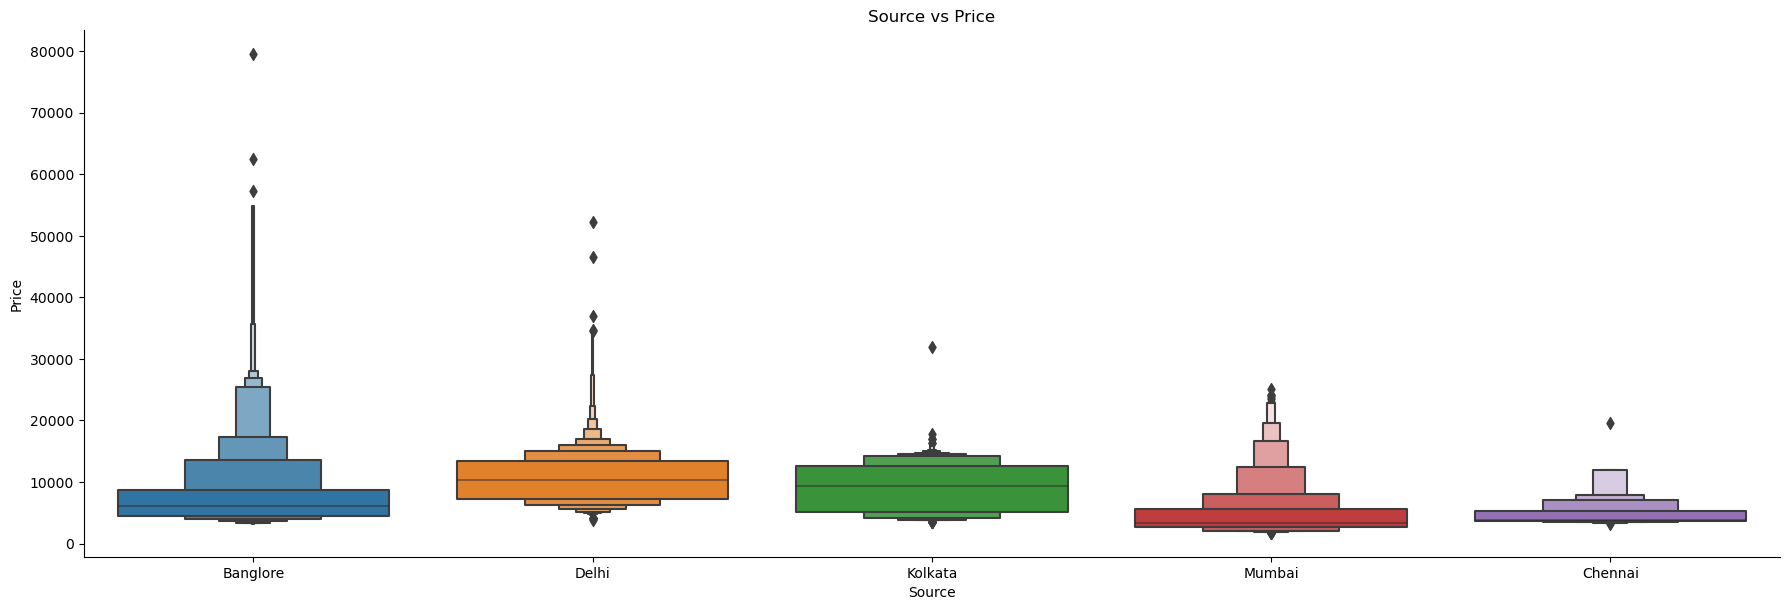

In [21]:
sns.catplot(x = 'Source', y= 'Price', data=flight_data.sort_values('Price', ascending=False), kind = 'boxen', height= 6, aspect=3)
plt.title('Source vs Price')
plt.show()

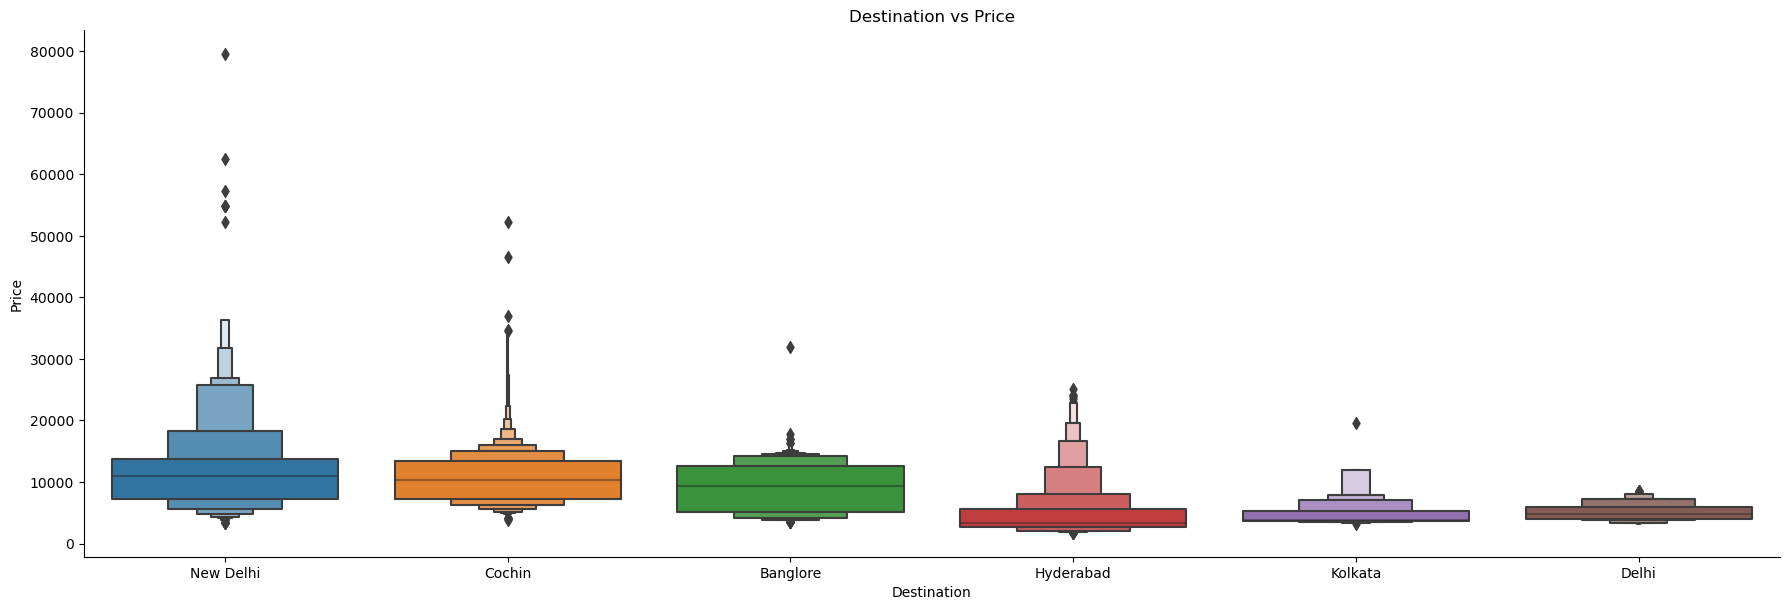

In [22]:
sns.catplot(x = 'Destination', y= 'Price', data=flight_data.sort_values('Price', ascending=False), kind = 'boxen', height= 6, aspect=3)
plt.title("Destination vs Price")
plt.show()

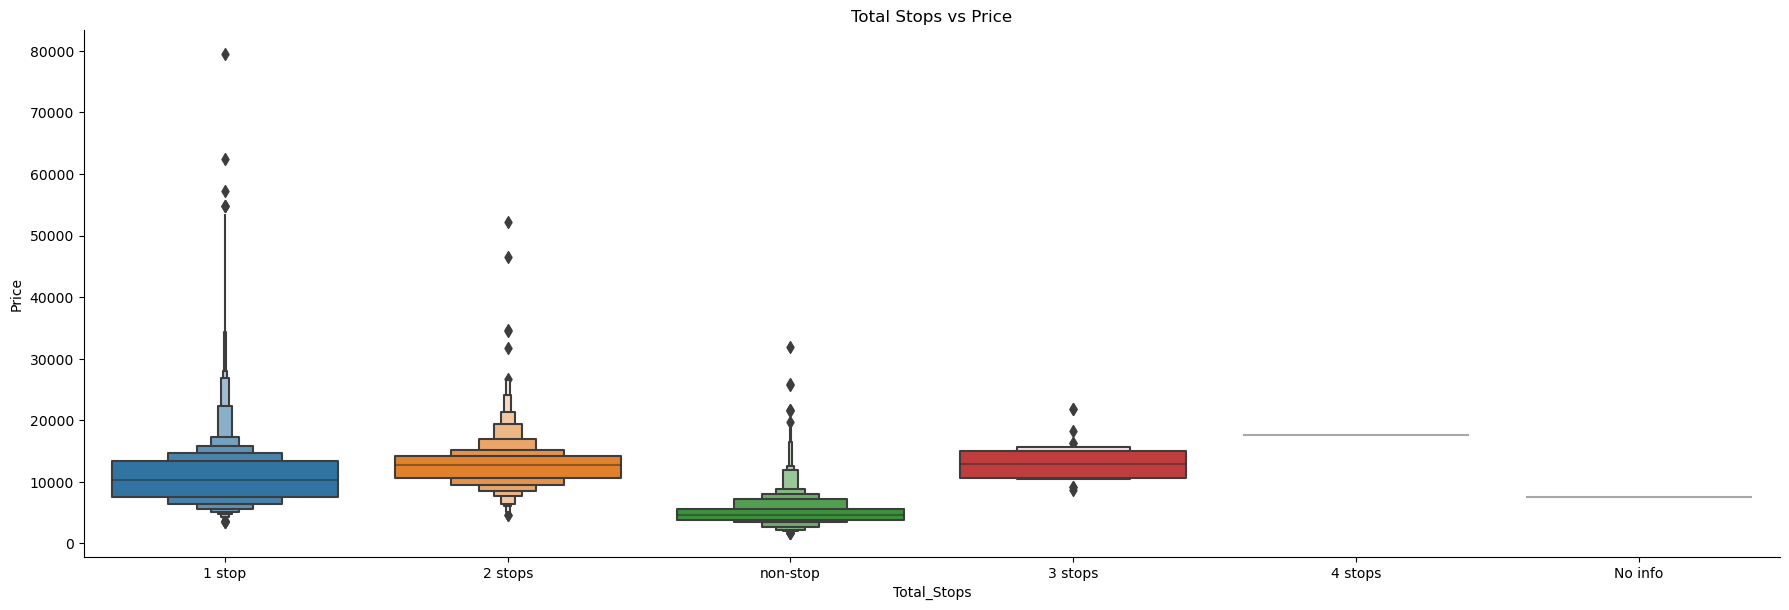

In [23]:
sns.catplot(x = 'Total_Stops', y= 'Price', data=flight_data.sort_values('Price', ascending=False), kind = 'boxen', height= 6, aspect=3)
plt.title("Total Stops vs Price")
plt.show()

### Handling outliers
- Outliers can significantly affect the performance of machine learning models.
- We need to detect and handle them appropriately.

In [24]:
# To handle outliers in a dataset with multiple columns,
# it is essential to focus on the numerical columns since outliers are typically relevant for numeric data. 
numerical_columns = flight_data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Price'], dtype='object')


<Axes: xlabel='Price'>

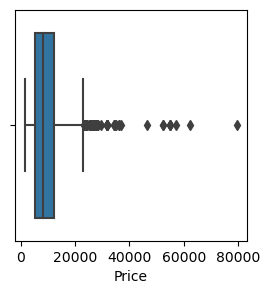

In [25]:
plt.figure(figsize=(3,3))
sns.boxplot(flight_data, x= 'Price')

- Since we have one outlier which is far away from other data points that we should remove the last one.

In [26]:
sorted(flight_data.Price, reverse=True)

[79512,
 62427,
 57209,
 54826,
 54826,
 54826,
 52285,
 52229,
 46490,
 36983,
 36235,
 36235,
 35185,
 34608,
 34503,
 34273,
 31945,
 31825,
 31825,
 31825,
 31825,
 31825,
 31825,
 31783,
 29528,
 28322,
 28097,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27992,
 27430,
 27282,
 27210,
 27210,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26890,
 26743,
 26480,
 26092,
 25913,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25735,
 25703,
 25430,
 25430,
 25139,
 24528,
 24318,
 24210,
 24115,
 24017,
 23843,
 23677,
 23583,
 23533,
 23528,
 23267,
 23170,
 23001,
 22950,
 22798,
 22794,
 22619,
 22294,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22270,
 22153,
 22096,
 22096,
 21954,
 21934,
 21934,
 21829,
 21829,
 21730,
 21730,
 21571,
 21520,


- We get to know that one data point(79512) is very far away from original data points, so we will remove it.

In [27]:
flight_data.drop(flight_data[flight_data['Price'] == 79512].index, inplace = True)
# We have removed the outlier which is far away from other data point

<Axes: xlabel='Price'>

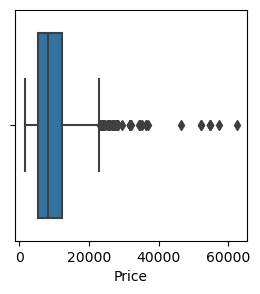

In [28]:
plt.figure(figsize=(3,3))
sns.boxplot(data=flight_data, x= 'Price')
# We have successfully removed the outlier

### In general, it's best to perform encoding before checking correlations because:

- Inclusion of Categorical Data: Encoding categorical variables into numeric form allows them to be included in correlation calculations, which typically require numeric input.

## To handle our flight data, we need to perform encoding in two ways:


### 1). Convert datetime-related columns: This includes splitting the Duration into hours and minutes and extracting relevant parts from Date_of_Journey, Dep_Time, and Arrival_Time.


### 2).Convert categorical strings: This includes converting categorical features like Airline, Source, Destination, and Total_Stops into numeric values using label encoding or one-hot encoding.

### For DateTime:
- Date_of_Journey
- Dep_Time
- Arrival_Time
- Duration


### For One Hot Encoding:
- Airline
- Source
- Destination

### For Label Encoding:
- Total stop

In [29]:
# Extracting the exact date and moth from complete date (i.e from Date_of_Journey)
flight_data["Journey_date"] = pd.to_datetime(flight_data["Date_of_Journey"], format='%d/%m/%Y').dt.day
flight_data["Journey_month"] = pd.to_datetime(flight_data["Date_of_Journey"], format='%d/%m/%Y').dt.month

print(flight_data[["Date_of_Journey", "Journey_date", "Journey_month"]])

      Date_of_Journey  Journey_date  Journey_month
0          24/03/2019            24              3
1           1/05/2019             1              5
2           9/06/2019             9              6
3          12/05/2019            12              5
4          01/03/2019             1              3
...               ...           ...            ...
10678       9/04/2019             9              4
10679      27/04/2019            27              4
10680      27/04/2019            27              4
10681      01/03/2019             1              3
10682       9/05/2019             9              5

[10682 rows x 3 columns]


In [30]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [31]:
flight_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [32]:
flight_data.head() # Date_of_Journey column has been removed and now we have extracted journey_date and journey_month

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [33]:
flight_data["Departure_hour"] = pd.to_datetime(flight_data["Dep_Time"]).dt.hour
flight_data["Departure_min"] = pd.to_datetime(flight_data["Dep_Time"]).dt.minute

print(flight_data[["Dep_Time", "Departure_hour", "Departure_min"]])

      Dep_Time  Departure_hour  Departure_min
0        22:20              22             20
1        05:50               5             50
2        09:25               9             25
3        18:05              18              5
4        16:50              16             50
...        ...             ...            ...
10678    19:55              19             55
10679    20:45              20             45
10680    08:20               8             20
10681    11:30              11             30
10682    10:55              10             55

[10682 rows x 3 columns]


In [34]:
flight_data.drop(["Dep_Time"],axis=1,inplace=True)

In [35]:
flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [36]:
# repeat the same process for arrival time

In [37]:
flight_data["Arrival_hour"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.hour
flight_data["Arrival_min"] = pd.to_datetime(flight_data["Arrival_Time"]).dt.minute
print(flight_data[["Arrival_Time", "Arrival_hour", "Arrival_min"]])

       Arrival_Time  Arrival_hour  Arrival_min
0      01:10 22 Mar             1           10
1             13:15            13           15
2      04:25 10 Jun             4           25
3             23:30            23           30
4             21:35            21           35
...             ...           ...          ...
10678         22:25            22           25
10679         23:20            23           20
10680         11:20            11           20
10681         14:10            14           10
10682         19:15            19           15

[10682 rows x 3 columns]


In [38]:
flight_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [39]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [40]:
# Time taken by plane to reach destination is called duration.
# Difference between arrival time and departure time.

In [41]:
# Converting duration column into list
duration = list(flight_data["Duration"])

# Ensuring all durations have both hours and minutes
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

# Lists to store hours and minutes separately
duration_hours = []
duration_mins = []

# Splitting durations into hours and minutes
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0].strip()))
    duration_mins.append(int(duration[i].split(sep="h")[1].split(sep="m")[0].strip()))

# Printing the result
print("Hours:", duration_hours)
print("Minutes:", duration_mins)


Hours: [2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17, 2, 8, 3,

- This loop ensures that all durations have both hours and minutes.
- duration[i].split() splits the string by spaces. If the length is not 2, it means either hours or minutes is missing.

- If "h" (hours) is present, add "0m" (minutes) to the duration.

- If "m" (minutes) is present without hours, add "0h" (hours) to the duration.

In [42]:
#Explanation of above code
# Dry run
# i = 2
# duration[2] = '19h'
# "19h" is missing minutes, so it becomes "19h 0m"
# After the loop:
 #duration = ['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m']

# Dry run
#i = 0
#duration[0] = '2h 50m'
#duration_hours.append(int(duration[0].split(sep="h")[0].strip()))  # duration_hours becomes [2]
#duration_mins.append(int(duration[0].split(sep="h")[1].split(sep="m")[0].strip()))  # duration_mins becomes [50]

#i = 2
#duration[2] = '19h 0m'
#duration_hours.append(int(duration[2].split(sep="h")[0].strip()))  # duration_hours becomes [2, 7, 19]
#duration_mins.append(int(duration[2].split(sep="h")[1].split(sep="m")[0].strip()))  # duration_mins becomes [50, 25, 0]

# After the loop:
#duration_hours = [2, 7, 19, 5, 4]
#duration_mins = [50, 25, 0, 25, 45]



In [43]:
print("Hours:", duration_hours)
print("Minutes:", duration_mins)

Hours: [2, 7, 19, 5, 4, 2, 15, 21, 25, 7, 13, 2, 2, 12, 2, 26, 4, 22, 23, 20, 5, 15, 2, 2, 13, 15, 5, 5, 2, 2, 2, 13, 2, 22, 5, 10, 5, 2, 6, 11, 11, 8, 22, 2, 12, 2, 2, 2, 16, 19, 3, 25, 2, 3, 2, 16, 15, 2, 6, 25, 12, 27, 10, 10, 2, 10, 2, 1, 13, 2, 1, 26, 7, 13, 5, 2, 2, 1, 19, 2, 14, 2, 22, 9, 10, 21, 5, 18, 12, 18, 9, 11, 17, 13, 2, 2, 2, 3, 1, 16, 12, 12, 7, 24, 2, 8, 7, 14, 30, 19, 15, 2, 12, 10, 5, 15, 16, 10, 2, 11, 2, 1, 14, 20, 2, 23, 18, 16, 2, 2, 8, 16, 3, 2, 14, 23, 21, 21, 2, 10, 8, 8, 5, 8, 11, 27, 8, 20, 4, 8, 2, 24, 2, 12, 12, 23, 16, 2, 25, 26, 28, 2, 25, 9, 4, 15, 1, 2, 9, 2, 22, 3, 11, 9, 12, 17, 5, 25, 20, 13, 18, 1, 9, 16, 2, 4, 5, 24, 2, 2, 4, 25, 6, 3, 18, 2, 12, 19, 2, 8, 9, 2, 3, 2, 12, 2, 9, 2, 9, 29, 2, 5, 9, 10, 4, 1, 11, 2, 2, 10, 2, 10, 1, 9, 22, 28, 37, 2, 1, 1, 25, 2, 6, 17, 5, 2, 25, 13, 2, 10, 8, 5, 12, 2, 2, 2, 9, 10, 2, 4, 3, 23, 27, 12, 24, 1, 2, 3, 11, 13, 2, 2, 2, 11, 14, 13, 14, 15, 2, 15, 12, 9, 12, 7, 27, 1, 1, 5, 11, 3, 24, 27, 2, 17, 2, 8, 3,

In [44]:
# Dry run
# Hours: [2, 7, 19, 5, 4]
 #Minutes: [50, 25, 0, 25, 45]


In [45]:
flight_data.drop(["Duration"],axis=1,inplace=True)

In [46]:
flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35


In [47]:
flight_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [48]:
Airline= flight_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline = Airline.astype(int) # to forcefully convert boolean values to integer,(otherwise encoding was being done as true/false)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [49]:
# firstly performing One hot encoding 

In [50]:
flight_data["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2196
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [51]:
Source= flight_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source = Source.astype(int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
flight_data["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     931
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [53]:
Destination= flight_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination= Destination.astype(int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
#secondly we perform label encoding for total stops
# Route and Total_Stops are related to each other
# for ex, Blr->CCU->Del   (Route)
# here total number of stops= 1

In [55]:
flight_data.drop(["Route"],axis=1,inplace=True)

In [56]:
# Total stops are ordinal type bcz as per our data
# more stops -> more price
# So we will do LABEL ENCODING

In [57]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35


In [58]:
flight_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
No info        1
4 stops        1
Name: count, dtype: int64

In [59]:
flight_data.replace({ "non-stop": 0, "1 stop": 1,  "2 stops": 2,  "3 stops": 3,  "4 stops": 4,  "No info": 5}, inplace=True)
print(flight_data['Total_Stops'].head())


0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64


### Concatenate Dataframe
- flight_data -> flight_data + source + destination + Airline

In [60]:
data_flight =pd.concat([flight_data,Airline,Source,Destination],axis=1)

In [61]:
data_flight.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,5,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,5,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,5,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,5,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,5,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
data_flight.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [63]:
data_flight.head()

,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,5,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,5,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,5,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
flight_data["Additional_Info"].value_counts()

Additional_Info
5                               8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [65]:
# Additonal info contains 80% no-info, so we will simply drop them.
data_flight.drop(["Additional_Info"],axis=1,inplace=True)

In [66]:
data_flight.head()

,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Checking Correlation

<Axes: >

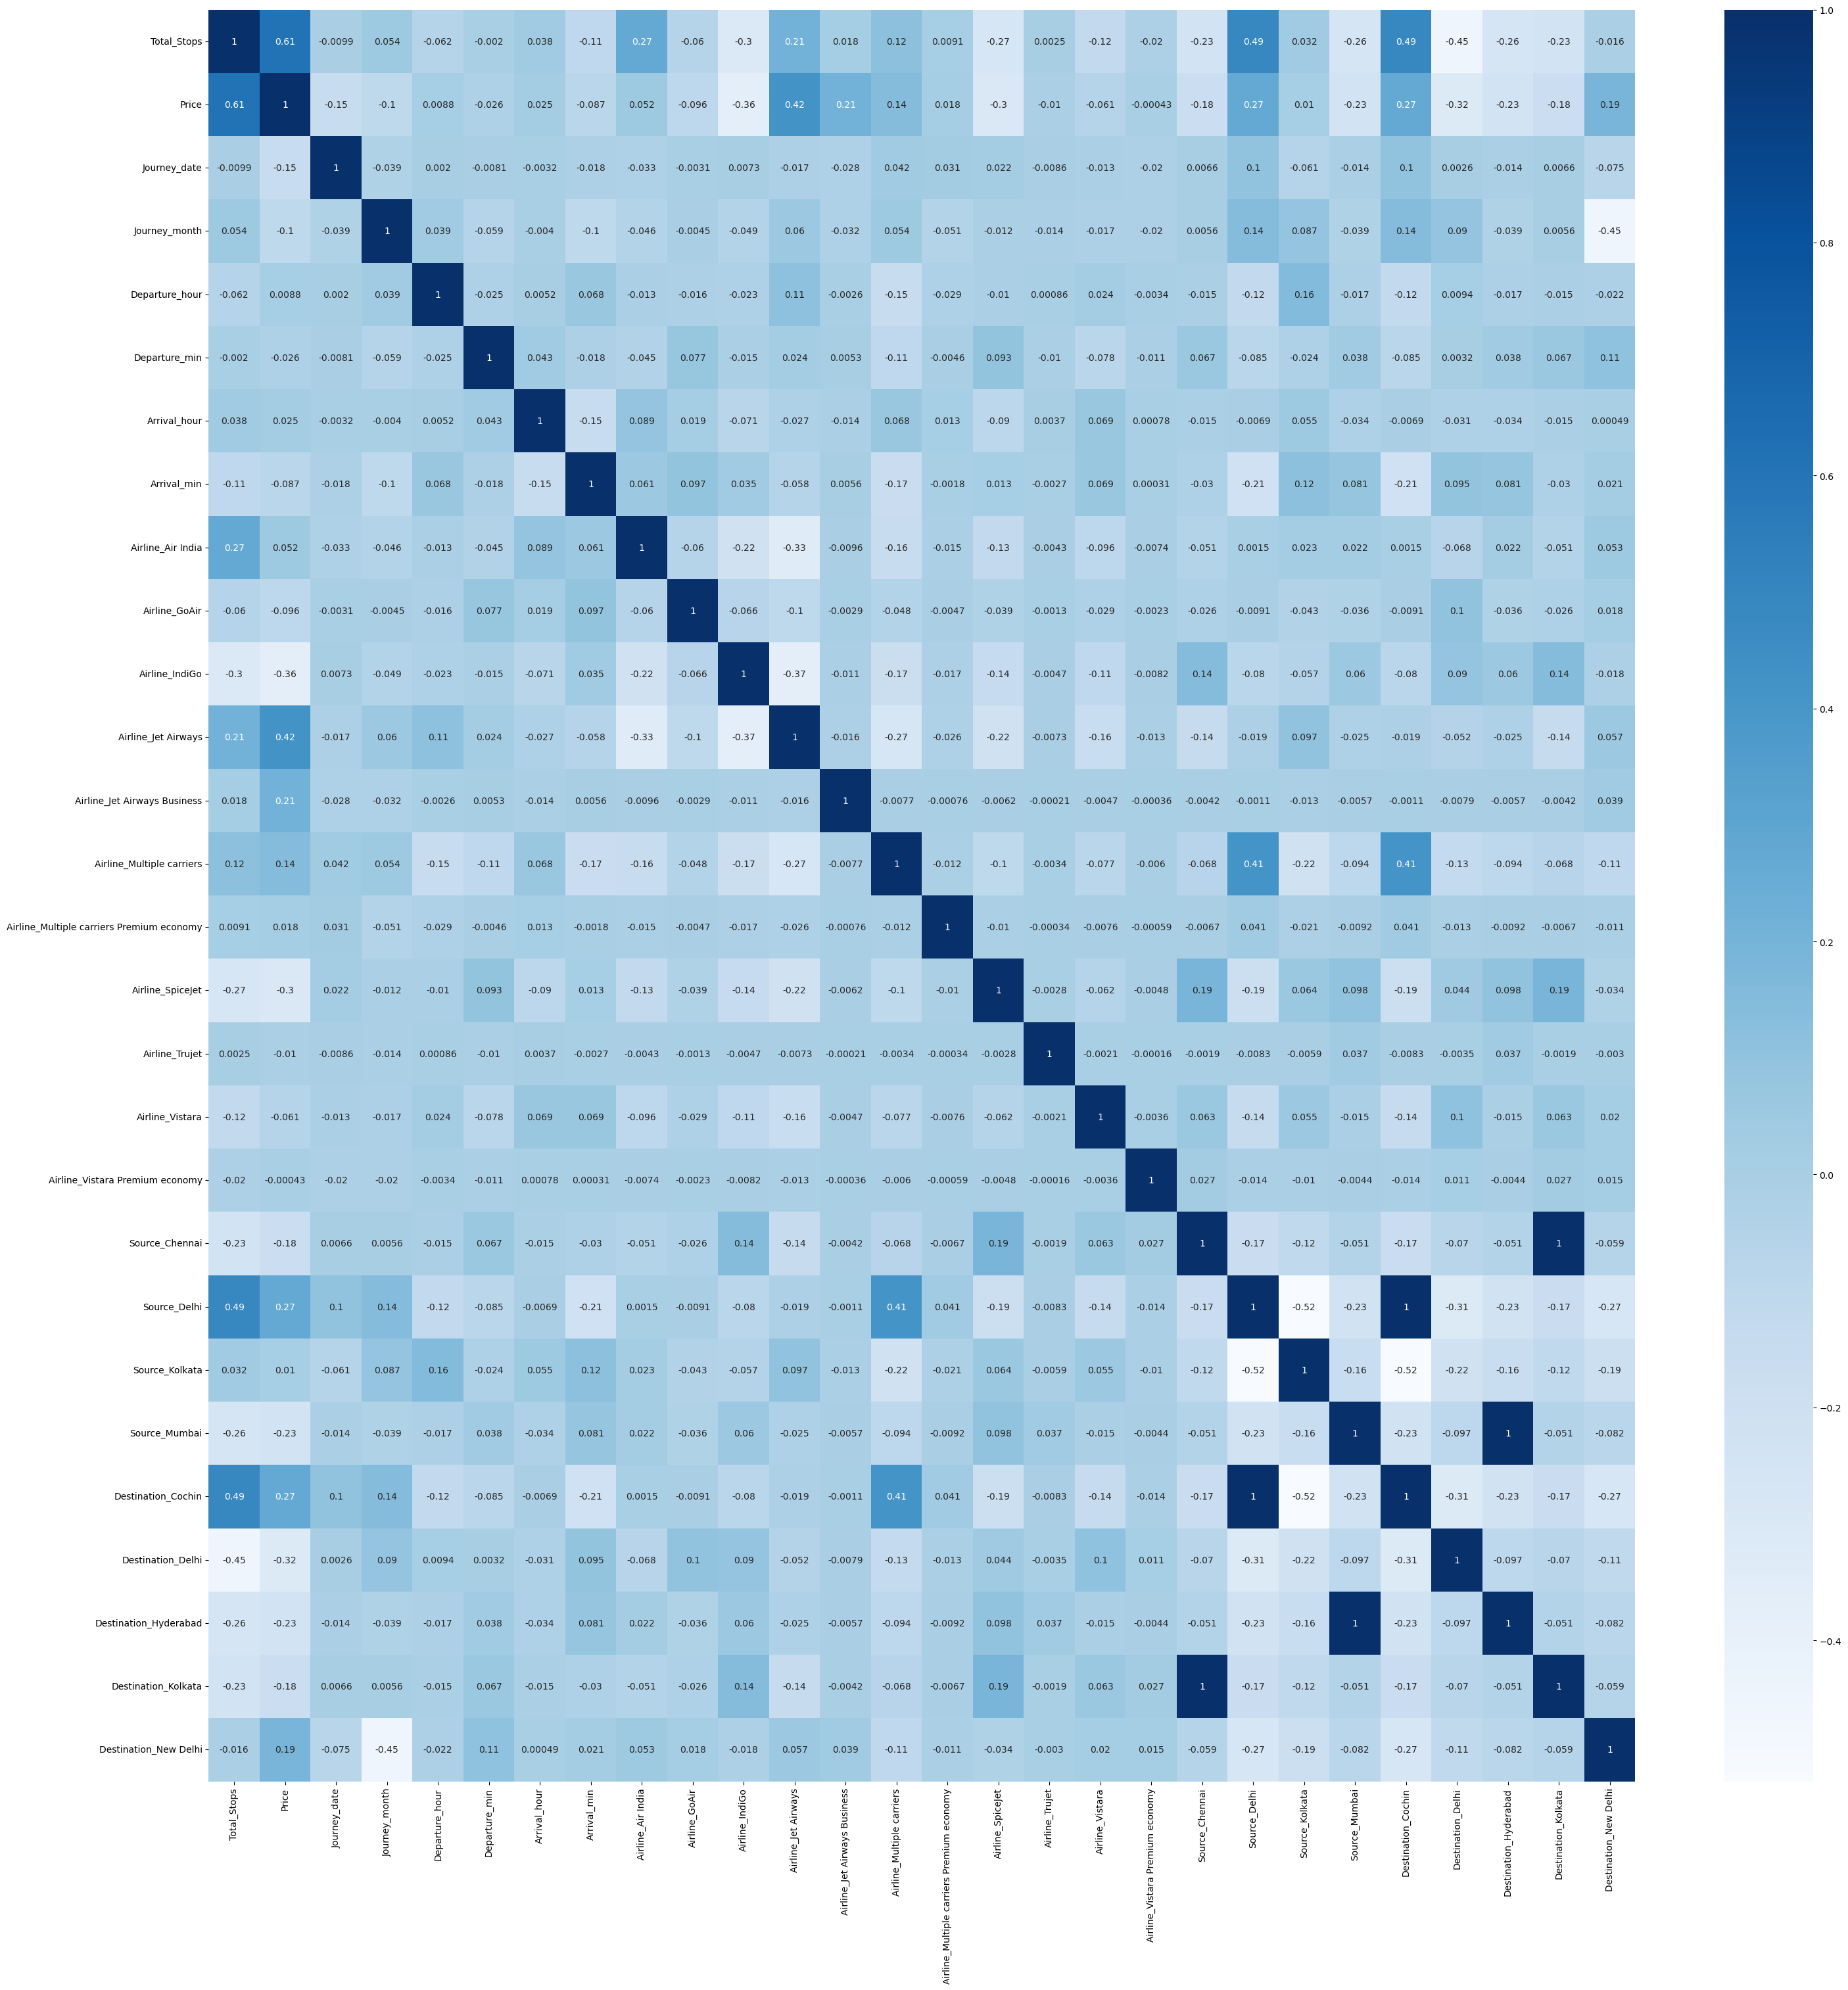

In [67]:
plt.figure(figsize=(35,35))
sns.heatmap(data_flight.corr(), annot = True, cmap = 'Blues')

## Defining Features and Target

In [68]:
df = pd.DataFrame(data_flight)

In [69]:
X = df.drop('Price', axis=1)
Y = df['Price']

## Splitting the Data¶

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# MODEL 1 : LINEAR REGRESSION

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()

In [73]:
lr.fit(X_train,Y_train)

LinearRegression()

In [74]:
X_test

,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6076,1,18,5,5,45,18,15,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3545,2,1,3,8,50,11,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9291,1,9,5,20,20,9,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5033,1,1,5,20,0,4,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2483,1,21,5,22,50,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1,27,6,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9871,0,6,3,17,15,19,45,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
10063,1,21,4,7,55,22,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8803,1,9,3,2,0,7,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [75]:
Y_test

6076     10844
3545     19372
9291      9187
5033     13941
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8803      7060
8618     13731
Name: Price, Length: 2137, dtype: int64

In [76]:
# Make predictions on the testing data
Y_pred = lr.predict(X_test)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 1936.4692818277058
Mean Squared Error (MSE): 7367286.459432303
Root Mean Squared Error (RMSE): 2714.2745733312063
R^2 Score: 0.6352159856641366


# MODEL 2 : RANDOM FOREST

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [80]:
Y_pred = reg_rf.predict(X_test)

In [81]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1113.9674466681995
Mean Squared Error (MSE): 2976934.1805822207
Root Mean Squared Error (RMSE): 1725.3794309027278
R^2 Score: 0.8526000031645159


# MODEL 3 : EXTRA TREES

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor()
et_regressor.fit(X_train, Y_train)

ExtraTreesRegressor()

In [83]:
# Make predictions on the testing data
Y_pred = et_regressor.predict(X_test)


In [84]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1177.4353673373887
Mean Squared Error (MSE): 3782215.428127047
Root Mean Squared Error (RMSE): 1944.7918727018186
R^2 Score: 0.8127272864232383


# MODEL 4 : DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [86]:
Y_pred = dt_regressor.predict(X_test)

In [87]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mse ** 0.5
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1303.1761347683669
Mean Squared Error (MSE): 4834482.782914783
Root Mean Squared Error (RMSE): 2198.745729481875
R^2 Score: 0.7606252931116292


# Model Comparison Report
- Create a report stating the performance of multiple models on this data and suggest the best model for production.

## REVIEWING THE MODELS AND THEIR SCORES

- MAE, MSE, and RMSE: Lower values indicate better model performance in terms of prediction accuracy.
- R² Score: Closer to 1 indicates that the model explains a larger proportion of the variance in the target variable.

                    MAE                   MSE                  RMSE                      R2
    
1).LINEAR REG :      1936.4692818277058    7367286.459432303     2714.2745733312063      0.6352159856641366
    
2).RANDOM FOREST:    1115.347244479887    2977416.11918977      1725.5190868807479        0.8525761404437037
    
3).EXTRA TREES REG : 1182.6583058805177    3829472.250954427     1956.903740850435         0.8103874108624529
    
4).DECISION TREE:    1294.0720948369988    4709546.9497634275    2170.149061646095        0.7668113692201532

## Hyperparameter Tuning
- after evaluating the performance of different models on our dataset, the next steps typically involve fine-tuning the models to optimize their performance.

- Hyperparameter tuning is not always compulsory, but it is highly recommended to achieve optimal performance from our machine learning models. Here are some considerations to help us decide whether to perform hyperparameter tuning and how many models to explore in a project:

                   -Model Performance: Evaluate the performance of our initial models (before tuning) using appropriate metrics like accuracy, mean squared error (MSE), mean absolute error (MAE), etc. If the performance is satisfactory and meets our project requirements, extensive tuning may not be necessary.

                    -Model Complexity: More complex models generally benefit more from hyperparameter tuning. Models with fewer hyperparameters or simpler structures (like linear regression) may not require extensive tuning compared to ensemble methods or deep learning models.
- Based on the performance metrics, it’s evident that **Random Forest and Extra Trees Regressor** are the top-performing models. Hyperparameter tuning for these models could yield further improvements.

- **Linear Regression** is not recommended for hyperparameter tuning due to its relatively poor performance and the limited improvement that can be achieved with tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [91]:
rf = RandomForestRegressor()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_rf.fit(X_train, Y_train)

# Best parameters and best score
print("Best parameters for Random Forest: ", grid_rf.best_params_)
print("Best score for Random Forest: ", grid_rf.best_score_)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters for Random Forest:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best score for Random Forest:  0.8004679346281743


In [92]:
predictions=grid_rf.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

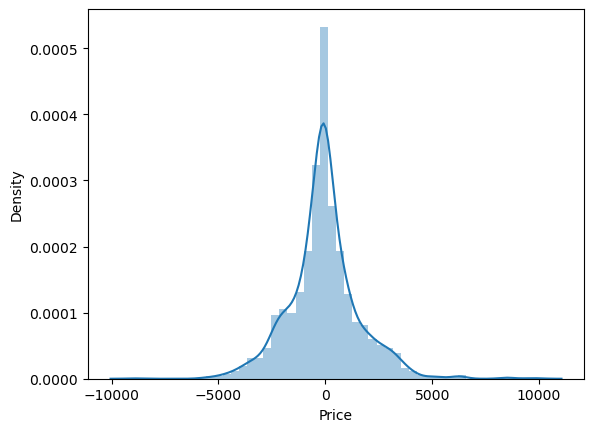

In [94]:
sns.distplot(Y_test-predictions)

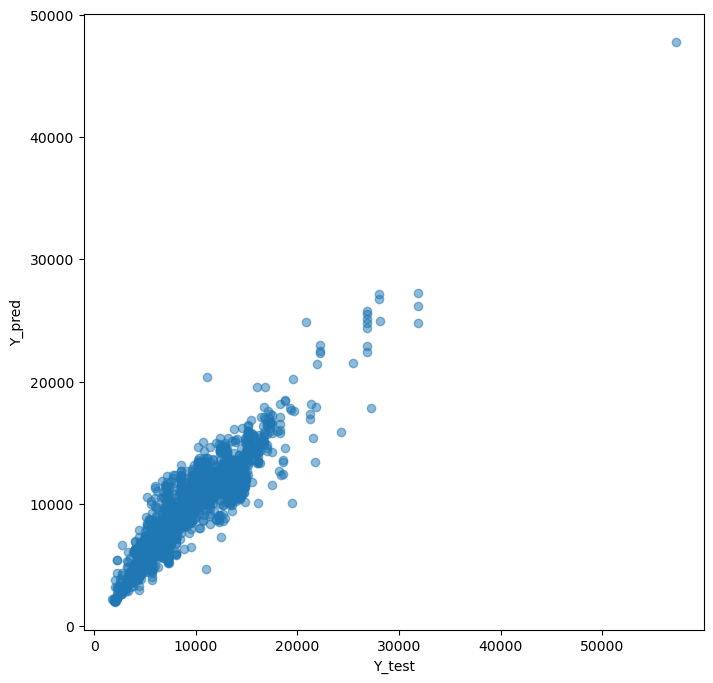

In [92]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, predictions, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [93]:
etr = ExtraTreesRegressor()

# Define the parameter grid
param_grid_etr = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_etr = GridSearchCV(estimator=etr, param_grid=param_grid_etr, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_etr.fit(X_train, Y_train)

# Best parameters and best score
print("Best parameters for Extra Trees Regressor: ", grid_etr.best_params_)
print("Best score for Extra Trees Regressor: ", grid_etr.best_score_)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters for Extra Trees Regressor:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Extra Trees Regressor:  0.7855942003028753


In [94]:
dt = DecisionTreeRegressor()

# Define the parameter grid
param_grid_dt = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_dt.fit(X_train, Y_train)

# Best parameters and best score
print("Best parameters for Decision Tree: ", grid_dt.best_params_)
print("Best score for Decision Tree: ", grid_dt.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Decision Tree:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score for Decision Tree:  0.7003112587907818


In [95]:
# Random Forest
best_rf = grid_rf.best_estimator_
Y_pred_rf = best_rf.predict(X_test)
print("Random Forest MAE: ", mean_absolute_error(Y_test, Y_pred_rf))
print("Random Forest MSE: ", mean_squared_error(Y_test, Y_pred_rf))
print("Random Forest RMSE: ", mean_squared_error(Y_test, Y_pred_rf, squared=False))
print("Random Forest R²: ", r2_score(Y_test, Y_pred_rf))
print("------------------------------------------------------------------------------------------")
# Extra Trees Regressor
best_etr = grid_etr.best_estimator_
Y_pred_etr = best_etr.predict(X_test)
print("Extra Trees Regressor MAE: ", mean_absolute_error(Y_test, Y_pred_etr))
print("Extra Trees Regressor MSE: ", mean_squared_error(Y_test, Y_pred_etr))
print("Extra Trees Regressor RMSE: ", mean_squared_error(Y_test, Y_pred_etr, squared=False))
print("Extra Trees Regressor R²: ", r2_score(Y_test, Y_pred_etr))
print("------------------------------------------------------------------------------------------")
# Decision Tree
best_dt = grid_dt.best_estimator_
Y_pred_dt = best_dt.predict(X_test)
print("Decision Tree MAE: ", mean_absolute_error(Y_test, Y_pred_dt))
print("Decision Tree MSE: ", mean_squared_error(Y_test, Y_pred_dt))
print("Decision Tree RMSE: ", mean_squared_error(Y_test, Y_pred_dt, squared=False))
print("Decision Tree R²: ", r2_score(Y_test, Y_pred_dt))
print("------------------------------------------------------------------------------------------")

Random Forest MAE:  1157.0763262109915
Random Forest MSE:  2761968.079736694
Random Forest RMSE:  1661.9169894241693
Random Forest R²:  0.8632438403010729
------------------------------------------------------------------------------------------
Extra Trees Regressor MAE:  1212.9472164237227
Extra Trees Regressor MSE:  3060066.337404338
Extra Trees Regressor RMSE:  1749.304529635803
Extra Trees Regressor R²:  0.8484837953785209
------------------------------------------------------------------------------------------
Decision Tree MAE:  1349.7188587695257
Decision Tree MSE:  4252414.616156944
Decision Tree RMSE:  2062.13836009055
Decision Tree R²:  0.7894458315359492
------------------------------------------------------------------------------------------


- Clearly best score we are getting in Random forest model.

# Report on Challenges faced
- Create a report which should include challenges you faced on data and what technique used with proper reason.

 # 1. Introduction
- This report provides an overview of the challenges encountered while cleaning and preprocessing the flight dataset. It details the techniques used to handle outliers, perform data encoding, and manage datetime-related features, along with the rationale behind choosing these methods.

# 2. Challenges in Handling Outliers
###  Identifying and Handling Outliers
- Challenge: Outliers were detected in several numerical columns, including Price and Duration, which could distort the results of the analysis and affect the performance of predictive models.

- Method Chosen: Outliers were identified using statistical methods like Z-score or Interquartile Range (IQR).

- Reason: These methods were chosen because they provide a systematic way to detect data points that deviate significantly from the rest of the dataset. By handling outliers, we ensured that the model was not unduly influenced by extreme values, leading to more robust and reliable predictions.

- Data Cleaning Process: After detecting the outliers, they were either removed or transformed depending on the context. If the outliers were due to data entry errors, they were corrected or removed. If they were legitimate but extreme, transformations such as log transformation were applied to reduce their impact.

# 3. Data Encoding Techniques

### Importance of Encoding Categorical Data
- Challenge: The dataset included several categorical features such as Airline, Source, Destination, and Total_Stops, which needed to be converted into a numerical format for analysis and modeling.

- Method Chosen: Two encoding techniques were used:

- One-Hot Encoding for Airline, Source, and Destination.
- Label Encoding for Total_Stops.
- Reason:

- One-Hot Encoding: This technique was chosen for nominal categorical variables where there is no inherent order between categories. It converts each category into a binary column, ensuring that the model does not infer any false ordinal relationships between them.
- Label Encoding: Applied to Total_Stops because it is an ordinal variable with a meaningful sequence (e.g., non-stop to 3 stops). Label Encoding preserves this order by assigning a numerical value to each category, reflecting their rank.
- Data Cleaning Process: The categorical variables were first inspected for consistency, ensuring that there were no spelling errors or inconsistencies in category names. Then, the appropriate encoding technique was applied to transform these categories into numerical features.

# 4. Managing Datetime-Related Features
###  Processing Duration and Other Datetime Columns
- Challenge: The Duration column contained mixed representations of time (hours and minutes), and columns like Date_of_Journey, Dep_Time, and Arrival_Time required extraction of relevant information.

- Method Chosen:

- Splitting Duration: The Duration column was split into hours and minutes to create separate features.Extracting Date and Time Components: Date_of_Journey, Dep_Time, and Arrival_Time were processed to extract useful components like day, month, year, and specific times.
- Reason: Breaking down complex datetime data into simpler, more granular features allows models to capture temporal patterns more effectively. For example, separating the Duration into hours and minutes enables the model to account for different lengths of flights more precisely.

- Data Cleaning Process: The Duration data was standardized to ensure consistency in how time was represented (e.g., adding "0h" where only minutes were provided). Date and time columns were processed to extract relevant components, which were then converted into numerical features for further analysis.